In [37]:
import numpy as np

def euler(f, x_init, T_fin, N):
    """
    Résout une équation différentielle ordinaire (EDO) en utilisant la méthode d'Euler explicite.

    :param f: La fonction f(t, x) décrivant la dérivée de x.
    :param x_init: La condition initiale x(0).
    :param T_fin: Le temps final T.
    :param N: Le nombre de pas N.
    :return: Deux tableaux T et X contenant les valeurs de temps et de solution obtenues par la méthode d'Euler.
    """
    T = np.linspace(0, T_fin, N+1)  # Création du tableau de temps
    X = np.zeros(N+1)  # Initialisation du tableau de solutions
    X[0] = x_init  # Condition initiale

    dt = T_fin / N  # Calcul du pas de temps

    # Calcul des solutions par la méthode d'Euler explicite
    for i in range(N):
        X[i+1] = X[i] + dt * f(T[i], X[i])

    return T, X


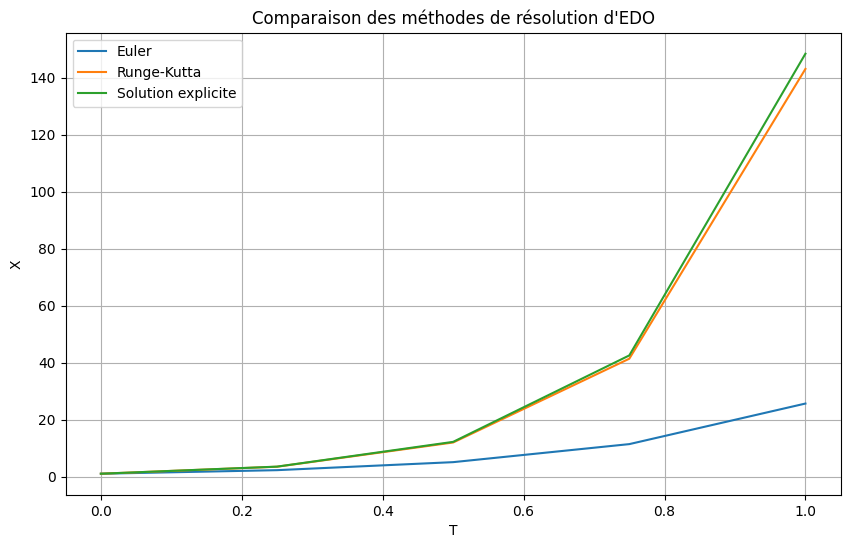

In [38]:
import numpy as np
import matplotlib.pyplot as plt


def runge_kutta(f, x_init, T_fin, N):
    """
    Résout une équation différentielle ordinaire (EDO) en utilisant la méthode de Runge-Kutta d'ordre 4.

    :param f: La fonction f(t, x) décrivant la dérivée de x.
    :param x_init: La condition initiale x(0).
    :param T_fin: Le temps final T.
    :param N: Le nombre de pas N.
    :return: Deux tableaux T et X contenant les valeurs de temps et de solution obtenues par la méthode de Runge-Kutta.
    """
    T = np.linspace(0, T_fin, N+1)  # Création du tableau de temps
    X = np.zeros(N+1)  # Initialisation du tableau de solutions
    X[0] = x_init  # Condition initiale
    dt = T_fin / N  # Calcul du pas de temps
    
    # Calcul des solutions par la méthode de Runge-Kutta d'ordre 4
    for i in range(N):
        k1 = f(T[i], X[i])
        k2 = f(T[i] + dt / 2, X[i] + dt / 2 * k1)
        k3 = f(T[i] + dt / 2, X[i] + dt / 2 * k2)
        k4 = f(T[i] + dt, X[i] + dt * k3)
        X[i+1] = X[i] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6

    return T, X

def x_dot(t, x):
    return 5*x

def euler_vs_runge_kutta_vs_explicit(N):
    """
    Résout l'équation différentielle x˙ = 5x avec les trois méthodes (Euler, Runge-Kutta, Solution explicite).

    :param N: Le nombre de pas N.
    """
    # Condition initiale et paramètres
    x_init = 1
    T_fin = 1

    # Résolution de l'équation différentielle avec les trois méthodes
    T_euler, X_euler = euler(x_dot, x_init, T_fin, N)
    T_rk, X_rk = runge_kutta(x_dot, x_init, T_fin, N)
    T_explicit = np.linspace(0, T_fin, N+1)
    X_explicit = np.exp(5 * T_explicit)

    # Tracé des résultats
    plt.figure(figsize=(10, 6))
    plt.plot(T_euler, X_euler, label="Euler")
    plt.plot(T_rk, X_rk, label="Runge-Kutta")
    plt.plot(T_explicit, X_explicit, label="Solution explicite")
    plt.xlabel("T")
    plt.ylabel("X")
    plt.title("Comparaison des méthodes de résolution d'EDO")
    plt.legend()
    plt.grid(True)
    plt.show()

# Test de la fonction avec un nombre de pas N
N = 4
euler_vs_runge_kutta_vs_explicit(N)


In [39]:
import numpy as np

def euler_Gen(g, x_init, T_fin, N):
    # Création d'une séquence de temps échantillonnée
    T = np.linspace(0, T_fin, N+1)
    
    # Calcul de l'incrément de temps
    dt = T_fin / N
    
    # Nombre de composantes dans le vecteur d'état initial
    dim = np.size(x_init)
    
    # Initialisation du tableau pour stocker les valeurs de chaque composante à chaque pas de temps
    X = np.zeros([N+1, dim])
    
    # Initialisation de la première ligne avec les valeurs initiales
    X[0, :] = x_init
    
    # Boucle pour calculer les valeurs à chaque pas de temps en utilisant la méthode d'Euler
    for i in range(N):
        # Calcul de la dérivée au temps actuel
        derivative = g(T[i], X[i])
        
        # Mise à jour des valeurs à l'aide de la méthode d'Euler
        X[i+1] = X[i] + dt * derivative
    
    return X

def RK_gen(g, x_init, T_fin, N):
    # Création d'une séquence de temps échantillonnée
    T = np.linspace(0, T_fin, N+1)
    
    # Calcul de l'incrément de temps
    dt = T_fin / N
    
    # Nombre de composantes dans le vecteur d'état initial
    dim = np.size(x_init)
    
    # Initialisation du tableau pour stocker les valeurs de chaque composante à chaque pas de temps
    X = np.zeros([N+1, dim])
    
    # Initialisation de la première ligne avec les valeurs initiales
    X[0, :] = x_init
    
    # Boucle pour calculer les valeurs à chaque pas de temps en utilisant la méthode de Runge-Kutta d'ordre 4
    for i in range(N):
        # Calcul des pentes aux différents points intermédiaires
        k1 = g(T[i], X[i])
        k2 = g(T[i] + dt/2, X[i] + k1 * dt/2)
        k3 = g(T[i] + dt/2, X[i] + k2 * dt/2)
        k4 = g(T[i] + dt, X[i] + k3 * dt)
        
        # Calcul de la valeur au pas de temps suivant en utilisant les pentes pondérées
        X[i+1] = X[i] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return X


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def ex1_comparaison_pendule(Tf, N):
    # Génération des instants de temps échantillonnés
    T = np.linspace(0, Tf, N+1)
    
    # Calcul des solutions approchées par les méthodes d'Euler et de Runge-Kutta
    Xeu = euler_Gen(lambda t, P: np.array([P[1], -9*P[0]]), np.array([1, 0]), Tf, N)
    Xru = RK_gen(lambda t, P: np.array([P[1], -9*P[0]]), np.array([1, 0]), Tf, N)
    
    # Calcul de la solution exacte
    Xex = np.cos(3*T)
    
    # Tracé des courbes
    plt.plot(T, Xeu[:, 0], label='Euler')
    plt.plot(T, Xru[:, 0], label='Runge-Kutta')
    plt.plot(T, Xex, label='Solution exacte')
    
    # Ajout de légendes et d'étiquettes
    plt.xlabel('t')
    plt.ylabel('x')
    
    # Calcul et affichage des erreurs d'approximation
    erreur_euler = np.max(np.abs(Xeu[:, 0] - Xex))
    erreur_RK4 = np.max(np.abs(Xru[:, 0] - Xex))
    print("Erreur d'approximation par la méthode d'Euler Explicite: ", erreur_euler)
    print("Erreur d'approximation par la méthode RK4: ", erreur_RK4)
    
    # Affichage de la légende
    plt.legend(loc='upper left')


Erreur d'approximation par la méthode d'Euler Explicite:  1.5849461191919598
Erreur d'approximation par la méthode RK4:  6.01604595497629e-05


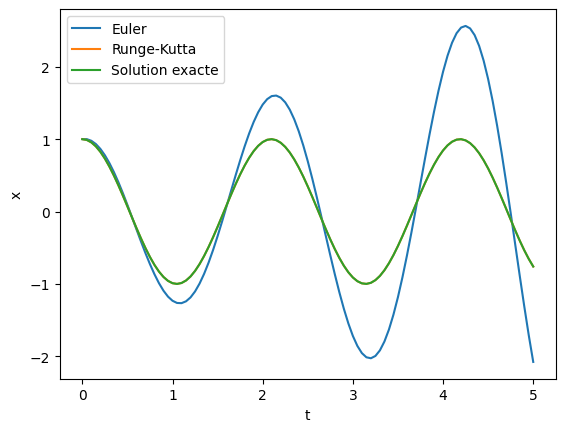

In [41]:
ex1_comparaison_pendule(5,100)
 #plus on augmente la valeur de N plus on remarque que les graphes se superposent

Population saine au temps T= 10 :  28.44818126777376
Population malade au temps T= 10 :  7.699270057950226e-07
Population guéris/décédée au temps T= 10 :  72.55181796229913


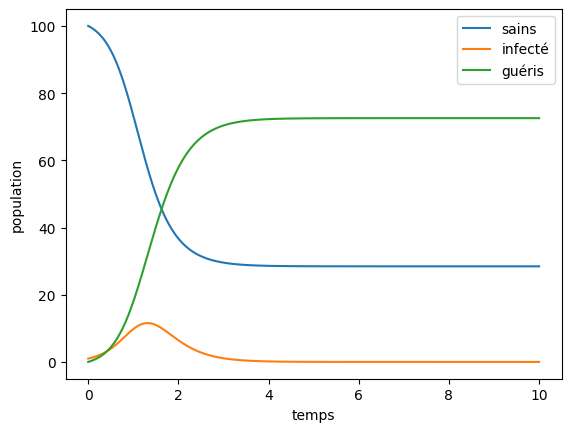

In [42]:
#EXERCICE 2
def sol_qst1(S,m,l,k,Tf,N) :
    T=np.linspace(0,Tf,N+1)
    X=RK_gen(lambda t,X:np.array([-k*X[0]*X[1]/(X[0]+X[1]+X[2]),k*X[0]*X[1]/(X[0]+X[1]+X[2]) - l*X[1],l*X[1]]),np.array([S,m,0]),Tf,N)

    plt.plot(T,X[:,0],label='sains')
    plt.plot(T,X[:,1],label='infecté')
    plt.plot(T,X[:,2],label='guéris')
    plt.xlabel('temps')
    plt.ylabel('population')
    plt.legend(loc='upper right')
    print('Population saine au temps T=',Tf,': ',X[N,0])
    print('Population malade au temps T=',Tf,': ',X[N,1])
    print('Population guéris/décédée au temps T=',Tf,': ',X[N,2])


sol_qst1(100,1,4,7,10,1000)


Population saine au temps T= 10 :  28.72731070650978
Population malade au temps T= 10 :  2.32737571219789e-05
Population guéris/décédée au temps T= 10 :  71.28266601973318


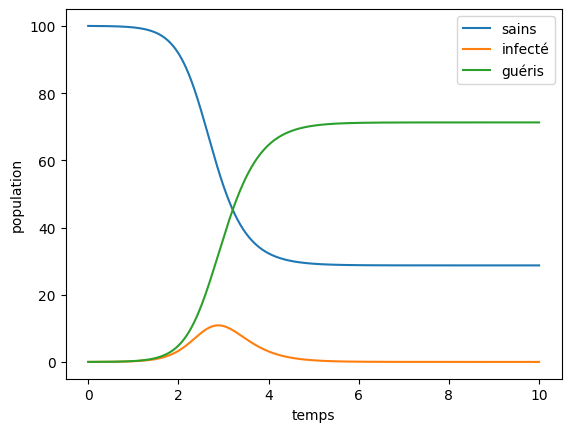

In [43]:
sol_qst1(100,0.01,4,7,10,1000)


In [44]:
"""Le schéma des solutions est similaire dans chaque cas :
peu importe la taille initiale de la population malade,
le nombre de personnes saines diminue jusqu'à atteindre 
une limite positive (qui semble converger vers environ                      
28,7 lorsque le nombre initial de malades tend vers 0). 
Ensuite, le nombre de personnes malades augmente jusqu'à 
un pic, puis diminue progressivement vers 0. Pendant ce temps,
le nombre de personnes guéries ou décédées augmente et tend vers une limite."""

"Le schéma des solutions est similaire dans chaque cas :\npeu importe la taille initiale de la population malade,\nle nombre de personnes saines diminue jusqu'à atteindre \nune limite positive (qui semble converger vers environ                      \n28,7 lorsque le nombre initial de malades tend vers 0). \nEnsuite, le nombre de personnes malades augmente jusqu'à \nun pic, puis diminue progressivement vers 0. Pendant ce temps,\nle nombre de personnes guéries ou décédées augmente et tend vers une limite."

In [47]:
def recherche_pic(S,m,l,k,Tf,N):
    T=np.linspace(0,Tf,N+1)
    X=RK_gen(lambda t,X:np.array([-k*X[0]*X[1]/(X[0]+X[1]+X[2]),k*X[0]*X[1]/(X[0]+X[1]+X[2]) - l*X[1],l*X[1]]),np.array([S,m,0]),Tf,N)
    L=[] #liste des pics
    P=[] #valeur des pics
    for i in range(1,N):
        if X[i-1,1]<=X[i,1] and X[i,1]>X[i+1,1]:
            L.append(T[i])
            P.append(X[i,1])
    return L,P

In [48]:
P,V=recherche_pic(100,1,4,7,10,1000)
print("temps d occurence des pics d épidémie:",P)
print("nombre de malades aux pics:",V)

temps d occurence des pics d épidémie: [1.32]
nombre de malades aux pics: [11.561742400383087]


Population saine au temps T= 12 :  97.26354254247727
Population malade au temps T= 12 :  1.7466706802331893e-06
Population guéris/décédée au temps T= 12 :  3.7364557108519696


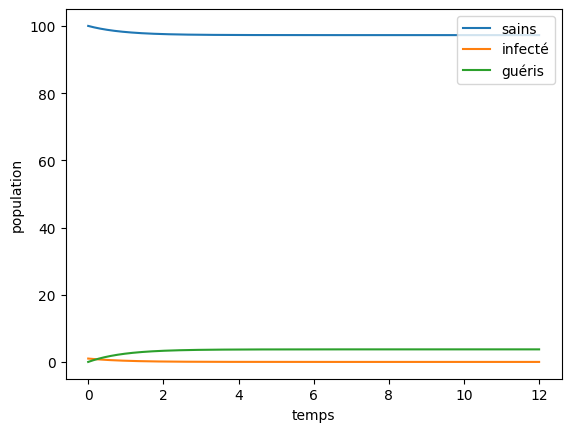

In [49]:
sol_qst1(100,1,4,3,12,1000)

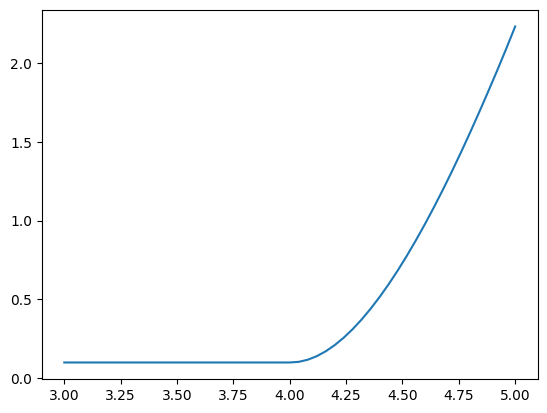

In [50]:
def sol(S,m,l,k,Tf,N):
    return RK_gen(lambda t,X:np.array([-k*X[0]*X[1]/(X[0]+X[1]+X[2]),k*X[0]*X[1]/(X[0]+X[1]+X[2]) - l*X[1],l*X[1]]),np.array([S,m,0]),Tf,N)


n=50#nombre d'intervalles dans la subdivision
kmin=3
kmax=5#On peut initialement fixer k=7
K=np.linspace(kmin,kmax,n+1)
Ymax=np.zeros(n+1)
for i in range(n+1):
    X=sol(100,0.1,4,K[i],15,100)#On fixe Tf=15,N=10000
    Ymax[i]=np.max(X[:,1])# on prend le maximum du nombe de malades
plt.plot(K,Ymax)
